In [85]:
# -
from copy import deepcopy
from random import shuffle
import pandas as pd
import numpy as np
from scipy.stats import entropy

# -
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

# Config plots 
sns.set(font_scale=2)
sns.set_style('ticks', {'axes.edgecolor': '0'})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

# -
def l2(x, y):
    return (y - x)**2

def l1(x, y):
    return np.abs(y - x)
    
def linf(x, y):
    return np.max([y, x])

def compactness(d):
    perimeter = np.sum(d)
    area = np.prod(d) / 2
    return perimeter / area

def kl(x, y):
    return entropy(x, y, base=2)
    
def norm(d):
    return np.linalg.norm(d)

In [90]:
num_samples = 50

# -
x = np.array([0.5, 0.5])
total_l = np.sum(x)
ep = 0.2

# -
y1s, cs, ns, kls = [], [], [], []
for n in range(num_samples):
    y1 = np.random.uniform(ep, total_l - ep)
    y2 = total_l - y1
    y = np.array([y1, y2])
    
    d = l2(y, x)
    
    y1s.append(y1)
    cs.append(compactness(d))
    ns.append(norm(d))
    kls.append(entropy(x, qk=y, base=2))
    
y1s = np.asarray(y1s)
cs = np.asarray(cs)
ns = np.asarray(ns)
kls = np.asarray(kls)

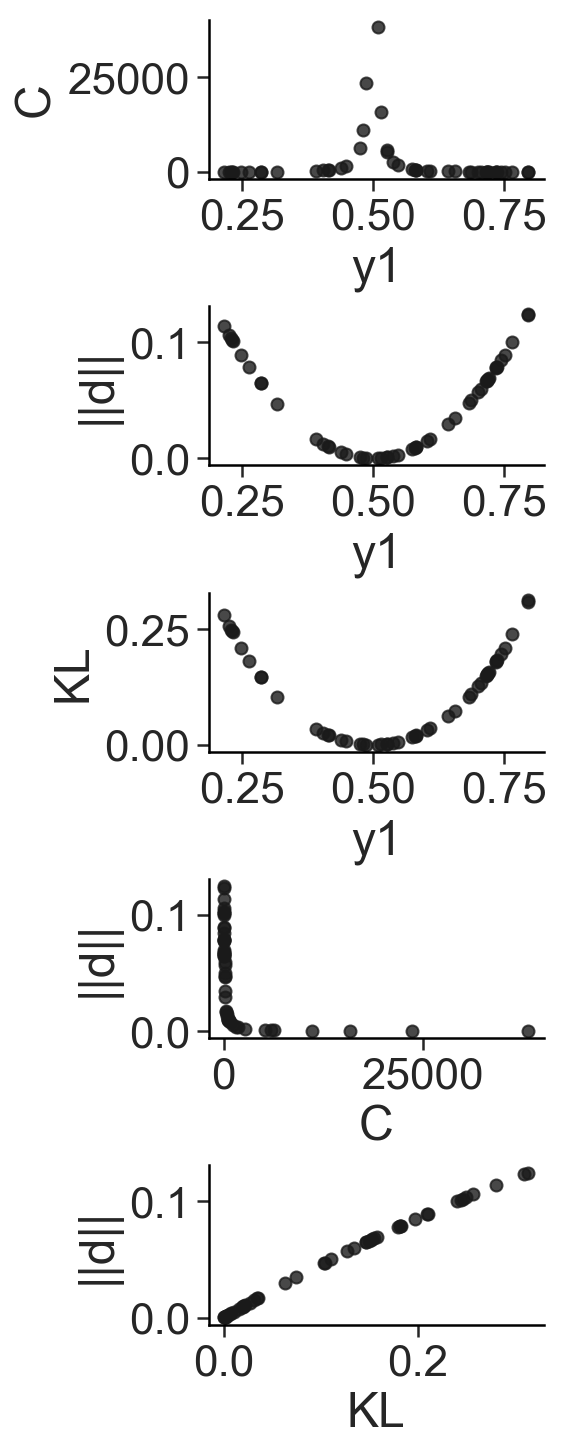

In [97]:
fig = plt.figure(figsize=(3, 12))
grid = plt.GridSpec(5, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.plot(y1s, cs, alpha=0.8, marker='o', linestyle='', color='k')
plt.xlabel("y1")
plt.ylabel("C")

plt.subplot(grid[1, 0])
plt.plot(y1s, ns, alpha=0.8, marker='o', linestyle='', color='k')
plt.xlabel("y1")
plt.ylabel("||d||")

plt.subplot(grid[2, 0])
plt.plot(y1s, kls, alpha=0.8, marker='o', linestyle='', color='k')
plt.xlabel("y1")
plt.ylabel("KL")

plt.subplot(grid[3, 0])
plt.plot(cs, ns, alpha=0.8, marker='o', linestyle='', color='k')
plt.xlabel("C")
plt.ylabel("||d||")

plt.subplot(grid[4, 0])
plt.plot(kls, ns, alpha=0.8, marker='o', linestyle='', color='k')
plt.xlabel("KL")
plt.ylabel("||d||")

sns.despine()

# Conclusion

- norm makes more sense than compactness